In [392]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
import matplotlib.animation as animation

In [393]:
# undirected graph with 22 nodes
graph = {
    'A': {'B', 'C', 'D'},
    'B': {'A', 'E', 'F'},
    'C': {'A', 'G', 'H'},
    'D': {'A', 'I'},
    'E': {'B', 'J'},
    'F': {'B', 'J', 'K'},
    'G': {'C', 'L'},
    'H': {'C', 'M'},
    'I': {'D', 'N'},
    'J': {'E', 'F', 'O'},
    'K': {'F', 'P'},
    'L': {'G', 'Q'},
    'M': {'H', 'R'},
    'N': {'I', 'S'},
    'O': {'J', 'T'},
    'P': {'K', 'U'},
    'Q': {'L', 'R'},
    'R': {'M', 'Q', 'V'},
    'S': {'N', 'T'},
    'T': {'O', 'S', 'U'},
    'U': {'P', 'T', 'V'},
    'V': {'R', 'U'}
}

In [394]:
G = nx.Graph(graph) # converting graph in dictionary format to a networkx graph

In [395]:
# draw graph function
def draw_graph(G):
    pos = nx.spring_layout(G,seed=0)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=10)
    plt.show()

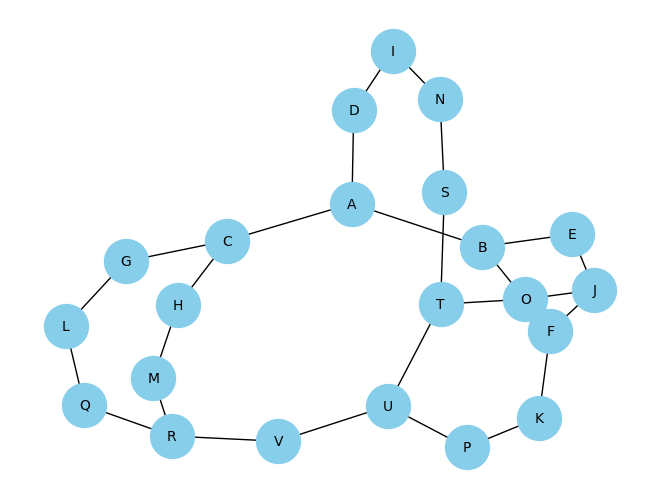

In [396]:
draw_graph(G)

In [397]:
# BFS
def bfs (graph, start_node):
    visited, queue = set(), collections.deque([start_node])
    visited.add(start_node)
    order =[]
    print(f'Starting BFS from node {start_node}')

    while queue:
        node = queue.popleft()
        order.append(node)
        print(f'Visited node {node}')

        for new_node in (graph[node] - visited):
            visited.add(new_node)
            queue.append(new_node)
        
    return order

In [398]:
# running BFS starting from node A
bfs_nodes = bfs(graph, 'A')
print(bfs_nodes)

Starting BFS from node A
Visited node A
Visited node D
Visited node B
Visited node C
Visited node I
Visited node E
Visited node F
Visited node G
Visited node H
Visited node N
Visited node J
Visited node K
Visited node L
Visited node M
Visited node S
Visited node O
Visited node P
Visited node Q
Visited node R
Visited node T
Visited node U
Visited node V
['A', 'D', 'B', 'C', 'I', 'E', 'F', 'G', 'H', 'N', 'J', 'K', 'L', 'M', 'S', 'O', 'P', 'Q', 'R', 'T', 'U', 'V']


In [ ]:
pos = nx.spring_layout(G, seed=0)
node_colors = ['skyblue' for _ in bfs_nodes]

def get_node_index(node):
    return list(G.nodes()).index(node)

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

def update(frame):
    ax.clear()
    current_node = bfs_nodes[frame]

    node_colors[get_node_index(current_node)] = 'red'

    nx.draw(G, pos, ax=ax, with_labels=True, node_color=node_colors, node_size=1000, font_size=10)
    
    ax.set_title(f'BFS Traversal - Visiting: {current_node}', fontsize=14)


In [390]:
anim = animation.FuncAnimation(fig, update, frames=len(bfs_nodes), interval=800, repeat=False)

In [391]:
plt.show()